In [32]:
# Installa solo le librerie necessarie
!pip install pandas seaborn matplotlib plotly statsmodels scikit-learn --quiet

# Importazioni
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [33]:
!pip install --upgrade plotly

In [34]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [35]:
# Carica i dati
data = pd.read_csv('london_weather.csv')  # Assumi che il file sia caricato su Colab
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [36]:
data.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'day', 'month', 'year'],
      dtype='object')

In [37]:
data.dtypes

date                datetime64[ns]
cloud_cover                float64
sunshine                   float64
global_radiation           float64
max_temp                   float64
mean_temp                  float64
min_temp                   float64
precipitation              float64
pressure                   float64
snow_depth                 float64
day                          int32
month                        int32
year                         int32
dtype: object

In [38]:
# Mappa i mesi
month_mapping = {1: 'Gennaio', 2: 'Febbraio', 3: 'Marzo', 4: 'Aprile', 5: 'Maggio', 6: 'Giugno',
                 7: 'Luglio', 8: 'Agosto', 9: 'Settembre', 10: 'Ottobre', 11: 'Novembre', 12: 'Dicembre'}
data['month_name'] = data['month'].map(month_mapping)

In [39]:
# Gestione valori mancanti
columns_to_fill = ['cloud_cover', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

In [40]:
# Statistiche descrittive
print("Statistiche descrittive:")
print(data.describe())

Statistiche descrittive:
                      date   cloud_cover      sunshine  global_radiation  \
count                15341  15341.000000  15341.000000      15341.000000   
mean   2000-01-01 00:00:00      5.268242      4.350238        118.756951   
min    1979-01-01 00:00:00      0.000000      0.000000          8.000000   
25%    1989-07-02 00:00:00      4.000000      0.500000         41.000000   
50%    2000-01-01 00:00:00      6.000000      3.500000         95.000000   
75%    2010-07-02 00:00:00      7.000000      7.200000        186.000000   
max    2020-12-31 00:00:00      9.000000     16.000000        402.000000   
std                    NaN      2.068790      4.028339         88.843200   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  15341.000000  15341.000000  15341.000000   15341.000000   15341.000000   
mean      15.388777     11.475511      7.559867       1.668634  101536.605594   
min       -6.200000     -7.600000    -11.800000

DATA VISUALIZATION

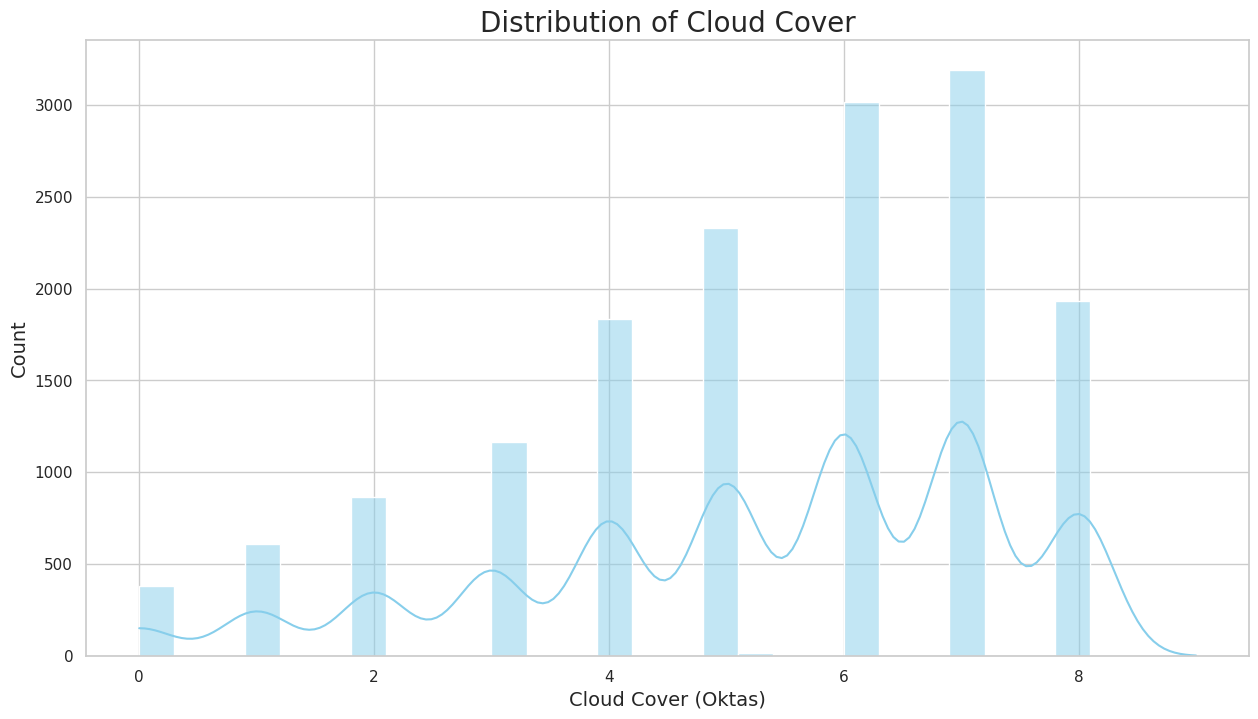

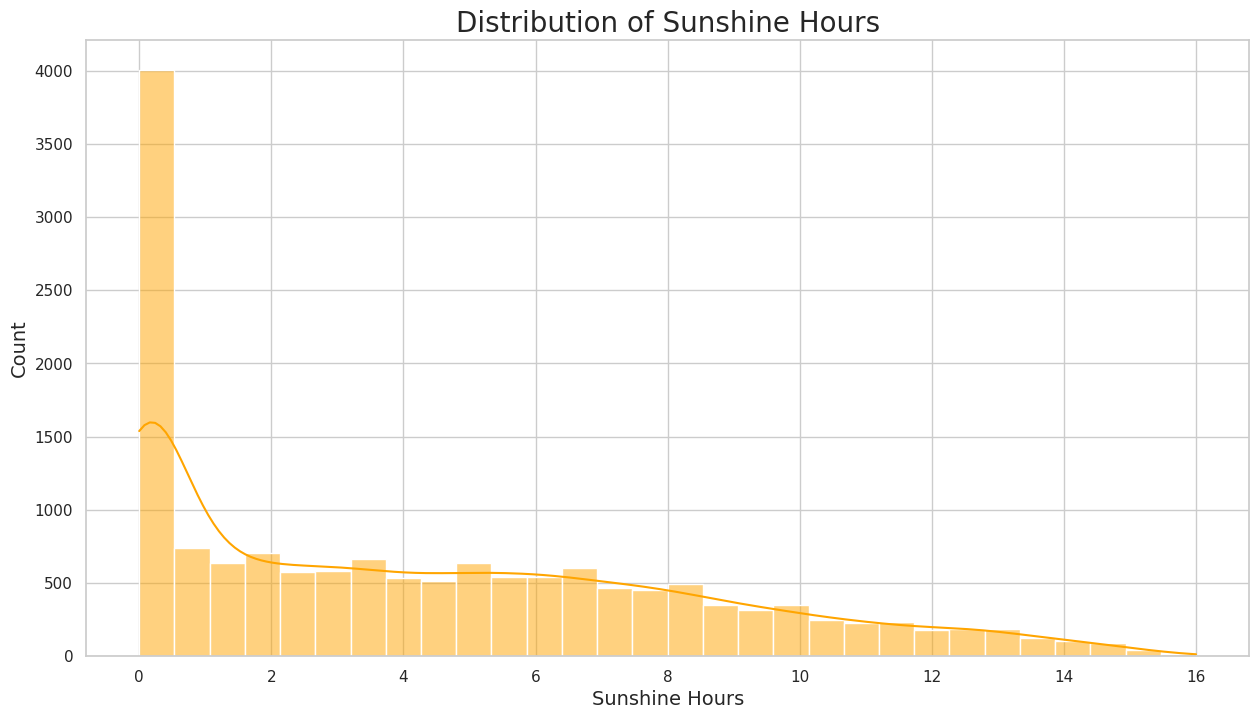

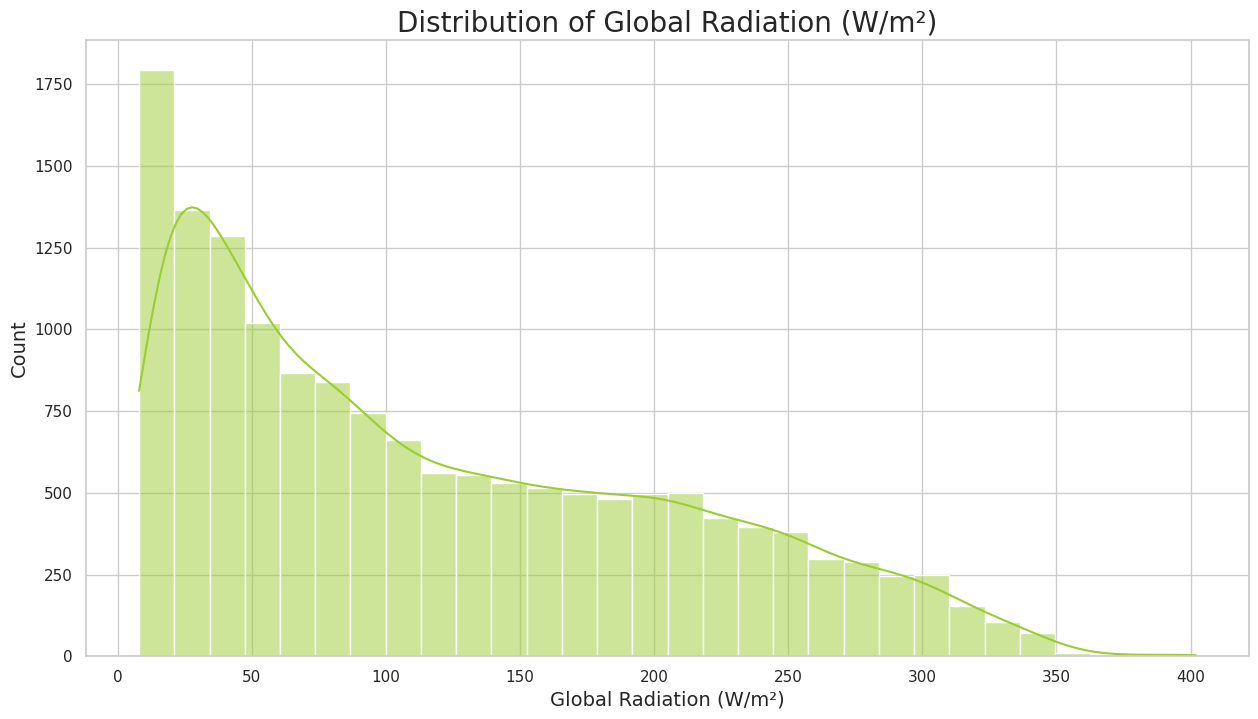

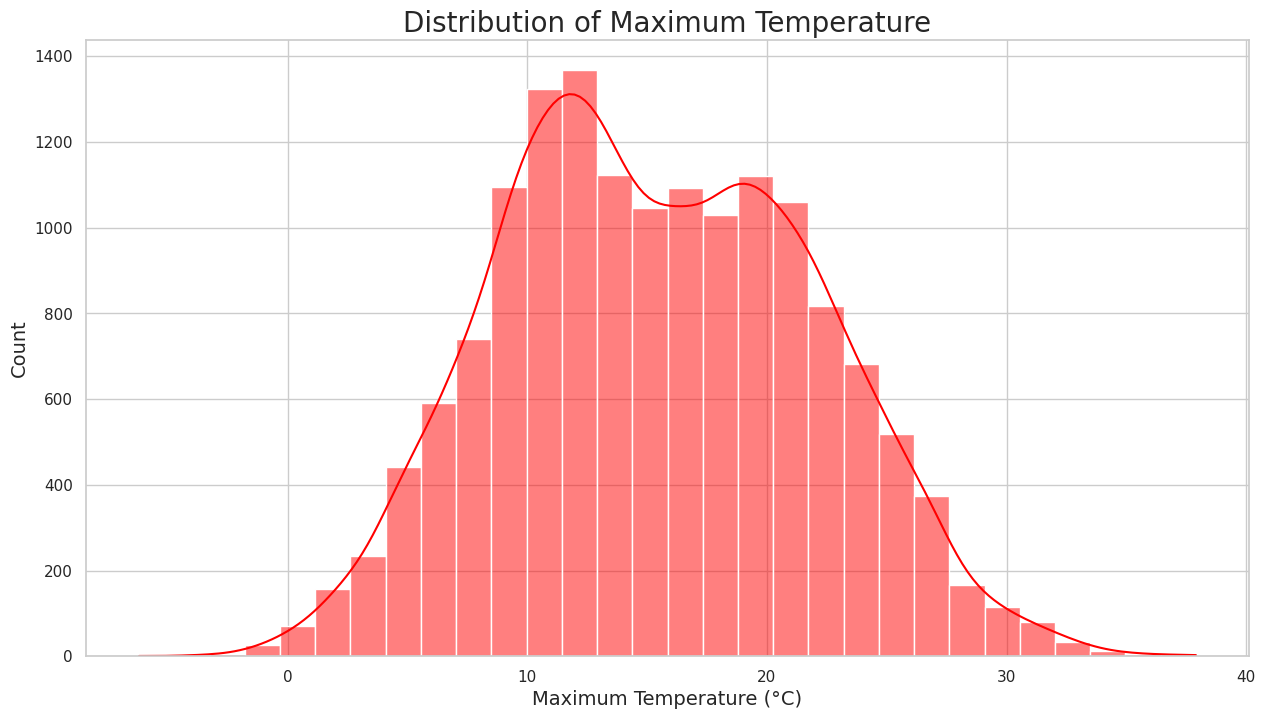

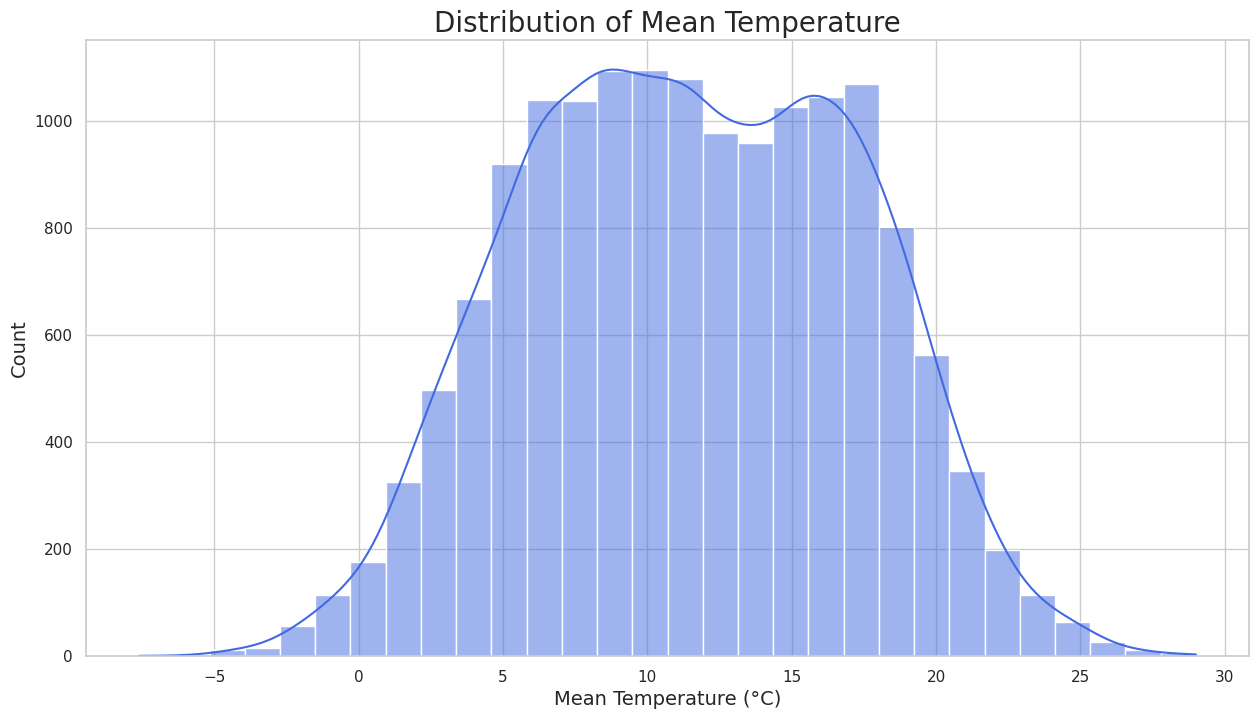

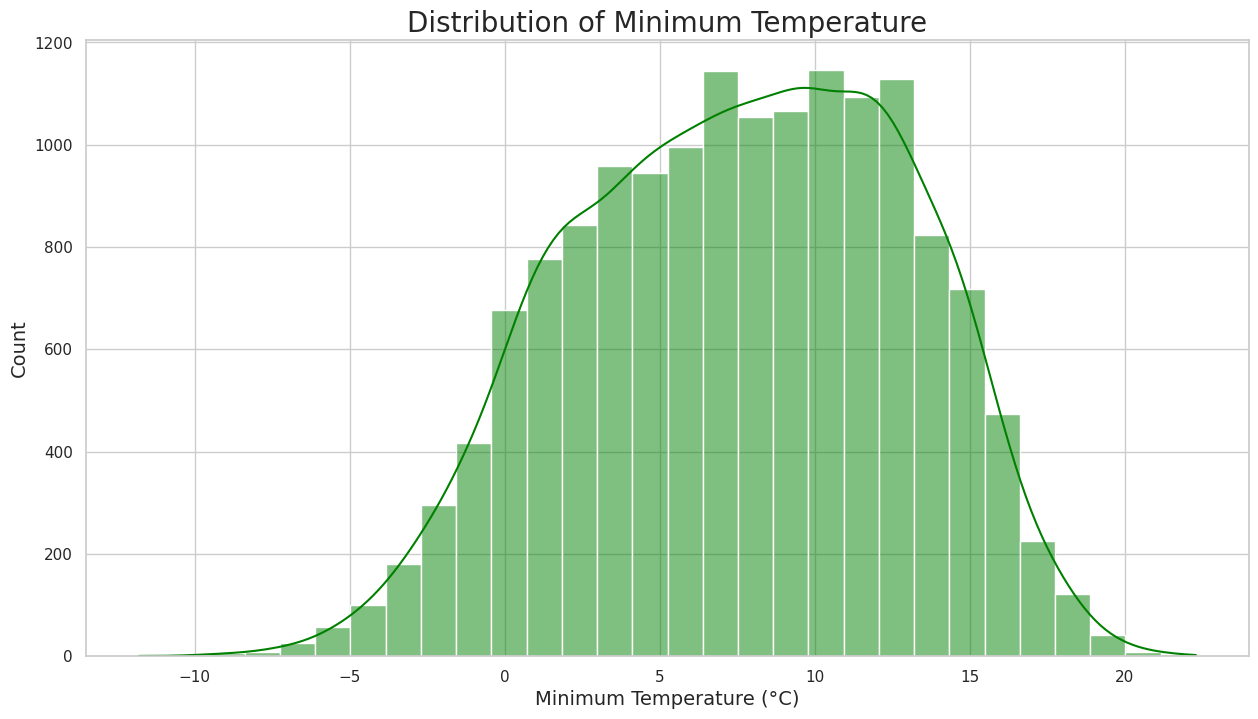

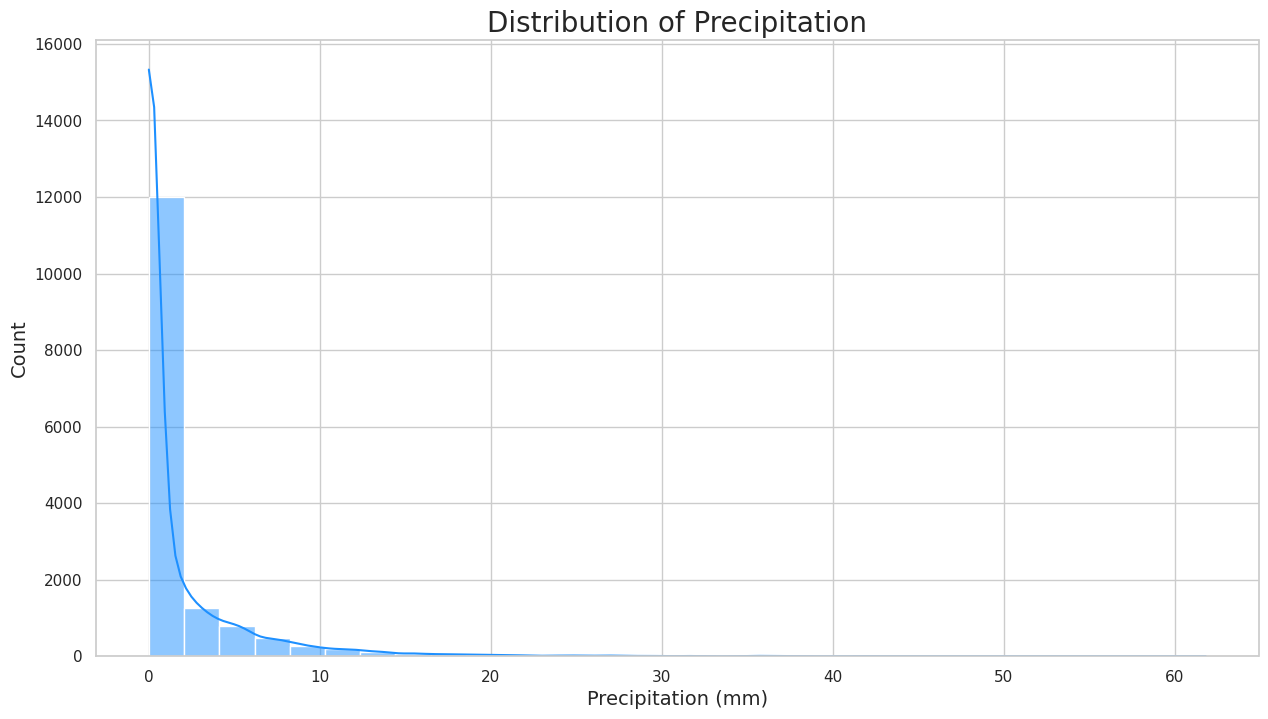

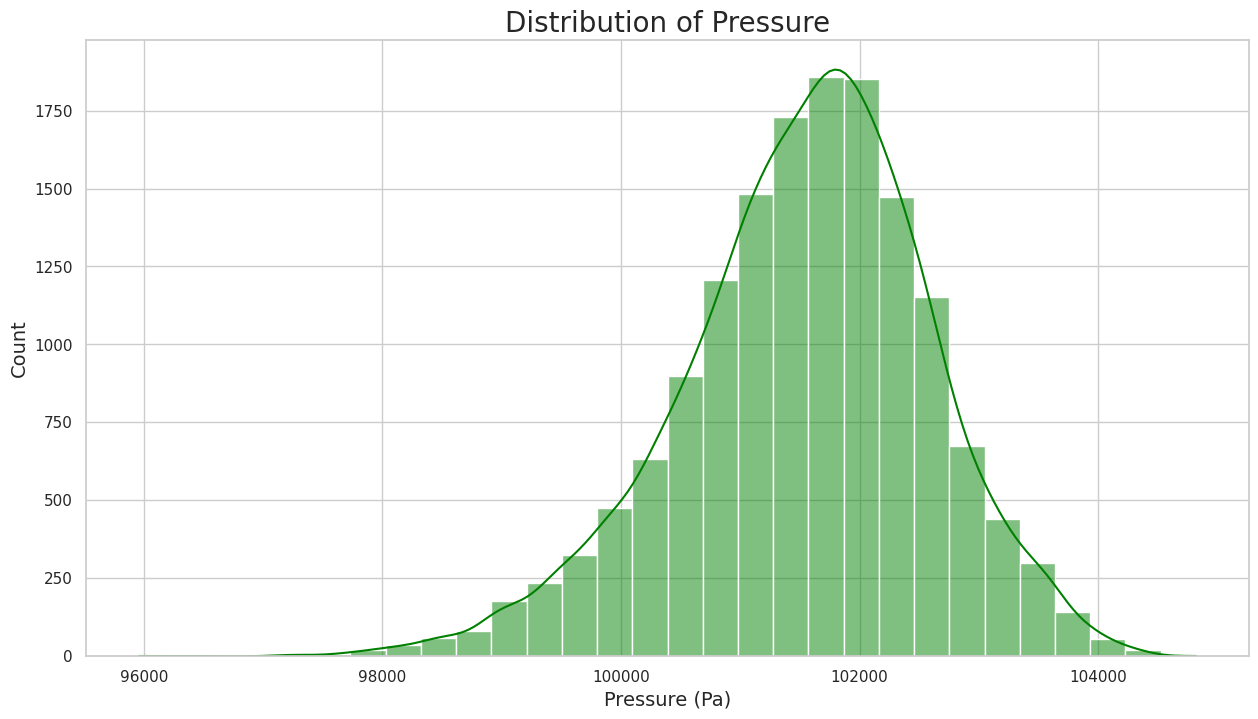

In [41]:


import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style='whitegrid')

# Cloud Cover Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['cloud_cover'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Cloud Cover', fontsize=20)
plt.xlabel('Cloud Cover (Oktas)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Sunshine Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['sunshine'], kde=True, color='orange', bins=30)
plt.title('Distribution of Sunshine Hours', fontsize=20)
plt.xlabel('Sunshine Hours', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Global Radiation Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['global_radiation'], kde=True, color='yellowgreen', bins=30)
plt.title('Distribution of Global Radiation (W/m²)', fontsize=20)
plt.xlabel('Global Radiation (W/m²)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Max Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['max_temp'], kde=True, color='red', bins=30)
plt.title('Distribution of Maximum Temperature', fontsize=20)
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Mean Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['mean_temp'], kde=True, color='royalblue', bins=30)
plt.title('Distribution of Mean Temperature', fontsize=20)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Min Temperature Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['min_temp'], kde=True, color='green', bins=30)
plt.title('Distribution of Minimum Temperature', fontsize=20)
plt.xlabel('Minimum Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Precipitation Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['precipitation'], kde=True, color='dodgerblue', bins=30)
plt.title('Distribution of Precipitation', fontsize=20)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Pressure Distribution
plt.figure(figsize=(15, 8))
sns.histplot(data['pressure'], kde=True, color='green', bins=30)
plt.title('Distribution of Pressure', fontsize=20)
plt.xlabel('Pressure (Pa)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()






PRECIPITAZIONI

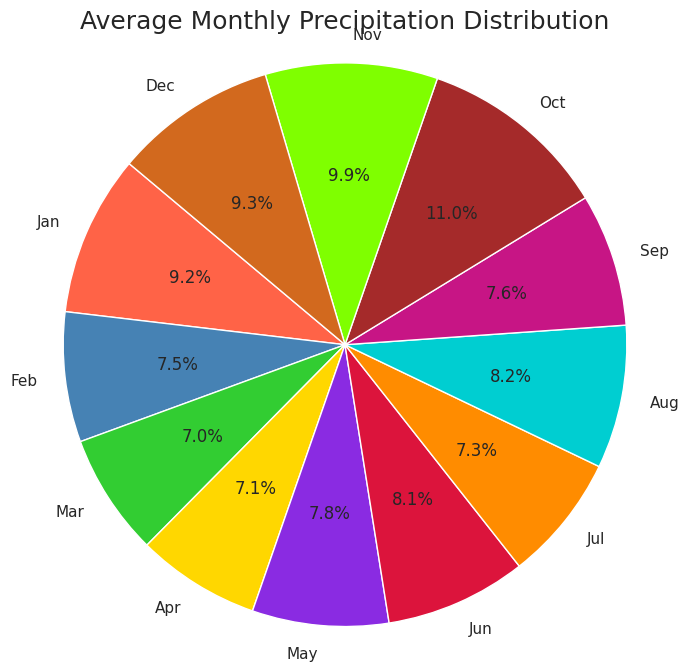

In [42]:
# Calcolare la precipitazione media mensile
monthly_precip = data.groupby('month')['precipitation'].mean()

# Definire le etichette dei mesi
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Crea il grafico a torta con colori distinti
plt.figure(figsize=(8, 8))
plt.pie(monthly_precip, labels=month_labels, autopct='%1.1f%%', startangle=140,
        colors=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#DC143C', '#FF8C00', '#00CED1',
                '#C71585', '#A52A2A', '#7FFF00', '#D2691E'])

# Impostazioni del grafico
plt.title('Average Monthly Precipitation Distribution', fontsize=18)
plt.axis('equal')  # Per renderlo un cerchio perfetto
plt.show()

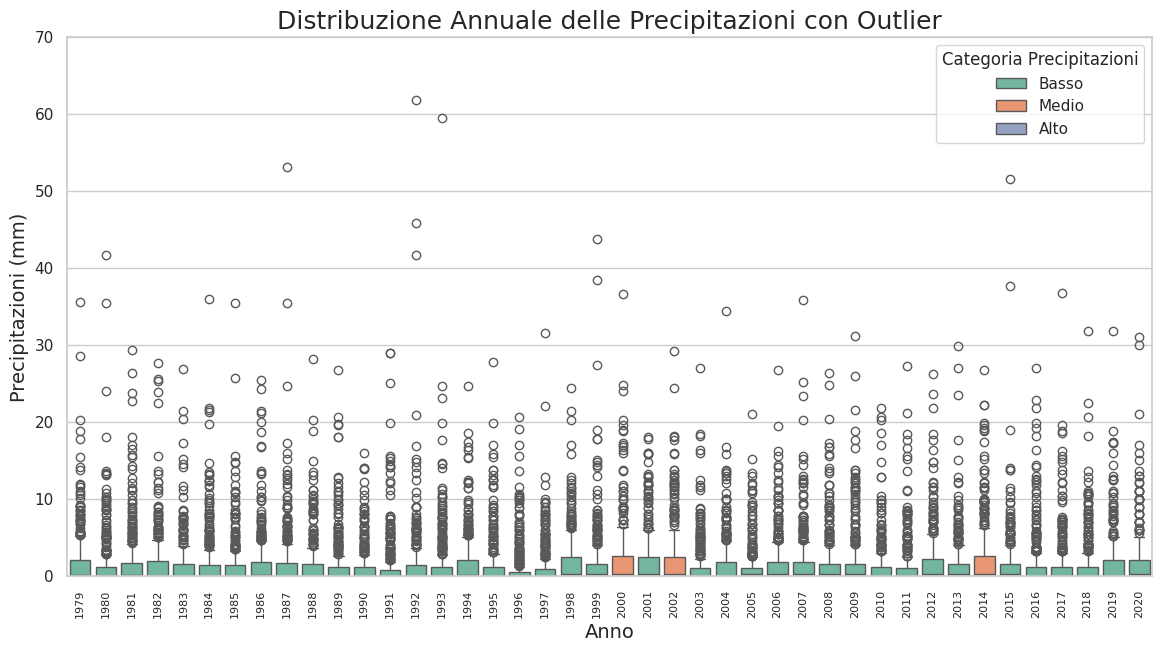

In [43]:
# Boxplot delle precipitazioni annuali con leggenda
annual_mean_precip = data.groupby('year')['precipitation'].mean().reset_index()
bins = [0, 2, 5, float('inf')]  # Intervalli: 0-2 mm, 2-5 mm, >5 mm
labels = ['Basso', 'Medio', 'Alto']
annual_mean_precip['precip_category'] = pd.cut(annual_mean_precip['precipitation'], bins=bins, labels=labels)
data = data.merge(annual_mean_precip[['year', 'precip_category']], on='year', how='left')

plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='precipitation', hue='precip_category', data=data, palette='Set2')
plt.title('Distribuzione Annuale delle Precipitazioni con Outlier', fontsize=18)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Precipitazioni (mm)', fontsize=14)
plt.ylim(0, 70)
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='Categoria Precipitazioni', loc='upper right')
plt.show()

TEMPERATURA


In [44]:
#  Grafico interattivo con Plotly per trend temperatura
fig = px.line(data, x='date', y='mean_temp', title='Trend Interattivo della Temperatura Media',
              labels={'mean_temp': 'Temperatura Media (°C)', 'date': 'Data'})
fig.update_layout(xaxis_title='Data', yaxis_title='Temperatura Media (°C)')
fig.show()

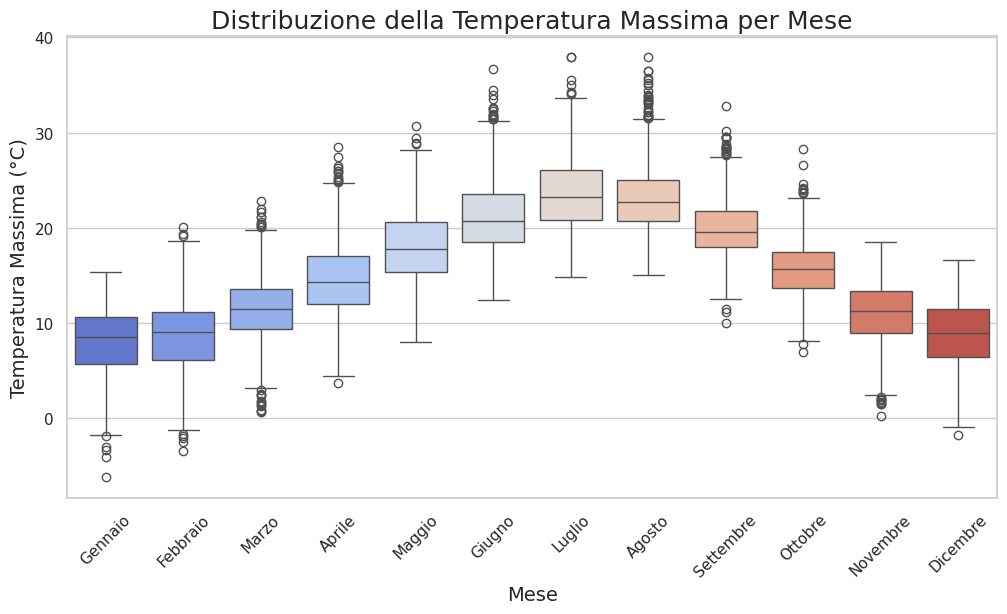

In [45]:
# Boxplot della temperatura massima per mese
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_name', y='max_temp', data=data, palette='coolwarm')
plt.title('Distribuzione della Temperatura Massima per Mese', fontsize=18)
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Temperatura Massima (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

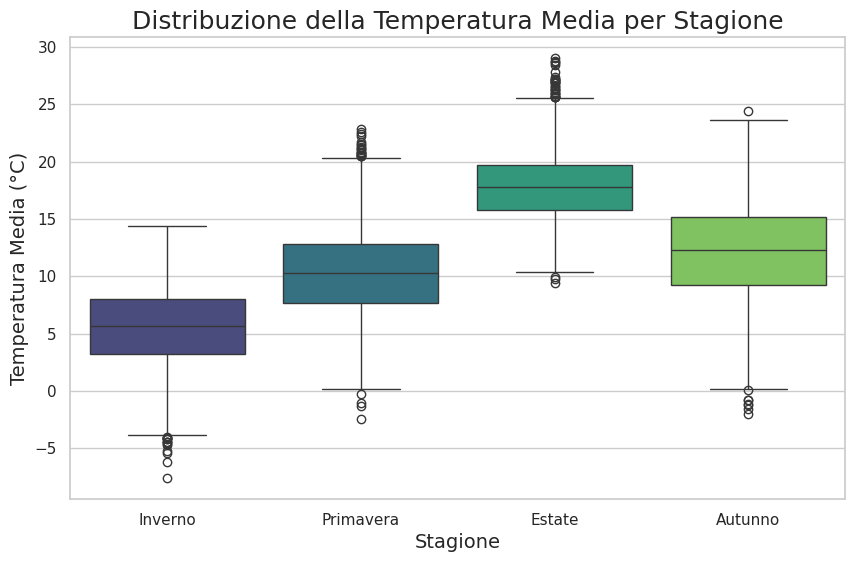

In [46]:
# Definizione delle stagioni e boxplot per temperatura media per stagione
def get_season(month):
    if month in [12, 1, 2]:
        return 'Inverno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Estate'
    elif month in [9, 10, 11]:
        return 'Autunno'

data['season'] = data['month'].apply(get_season)
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='mean_temp', data=data, order=['Inverno', 'Primavera', 'Estate', 'Autunno'], palette='viridis')
plt.title('Distribuzione della Temperatura Media per Stagione', fontsize=18)
plt.xlabel('Stagione', fontsize=14)
plt.ylabel('Temperatura Media (°C)', fontsize=14)
plt.show()

TEMPERATURA E PRECIPITAZIONI

In [48]:
# Scatterplot interattivo con Plotly
fig = px.scatter(data, x='mean_temp', y='precipitation', color='month_name',
                 title='Relazione tra Temperatura Media e Precipitazioni',
                 labels={'mean_temp': 'Temperatura Media (°C)', 'precipitation': 'Precipitazioni (mm)'})
fig.show()

In [49]:
#  Scatterplot 3D interattivo con Plotly
fig_3d = px.scatter_3d(data, x='mean_temp', y='precipitation', z='global_radiation', color='month_name',
                        title='Relazione 3D tra Temperatura, Precipitazioni e Radiazione Globale')
fig_3d.show()

ANALISI AGGIUNTIVE

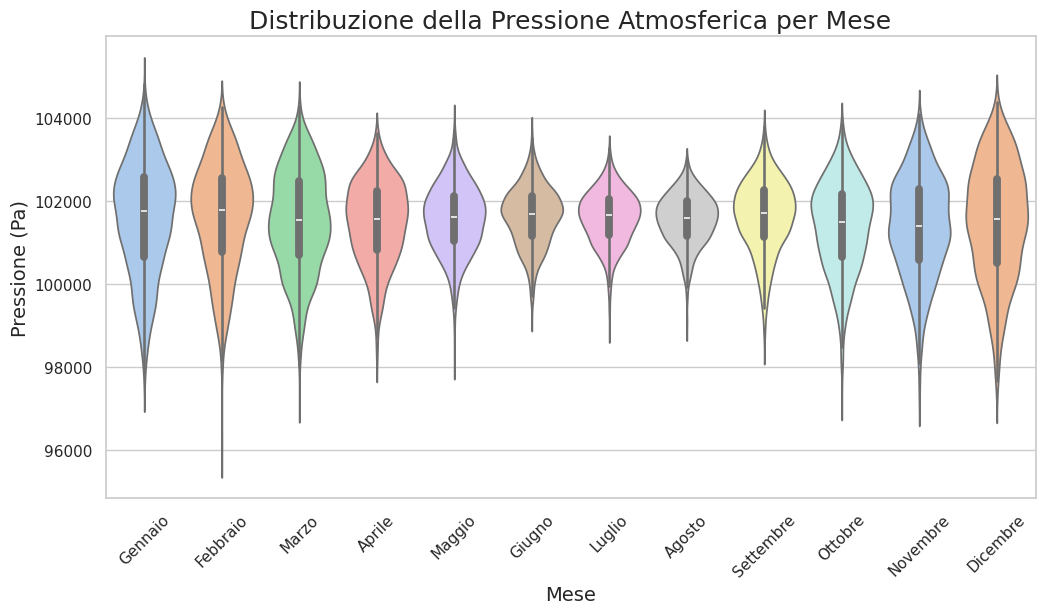

In [50]:
# Violin plot per pressione atmosferica per mese
plt.figure(figsize=(12, 6))
sns.violinplot(x='month_name', y='pressure', data=data, palette='pastel')
plt.title('Distribuzione della Pressione Atmosferica per Mese', fontsize=18)
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Pressione (Pa)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

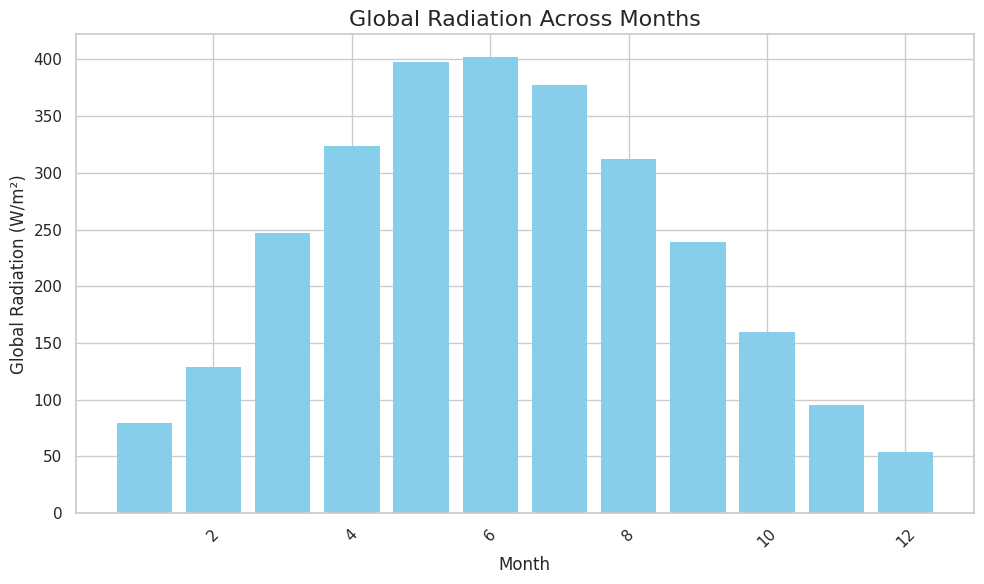

In [51]:


# Plotting the bar chart with a single color (e.g., 'skyblue') and no border
plt.figure(figsize=(10, 6))
plt.bar(data['month'], data['global_radiation'], color='skyblue', edgecolor='none')

# Title and labels
plt.title('Global Radiation Across Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Global Radiation (W/m²)', fontsize=12)

# Customize the plot's background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()
plt.show()


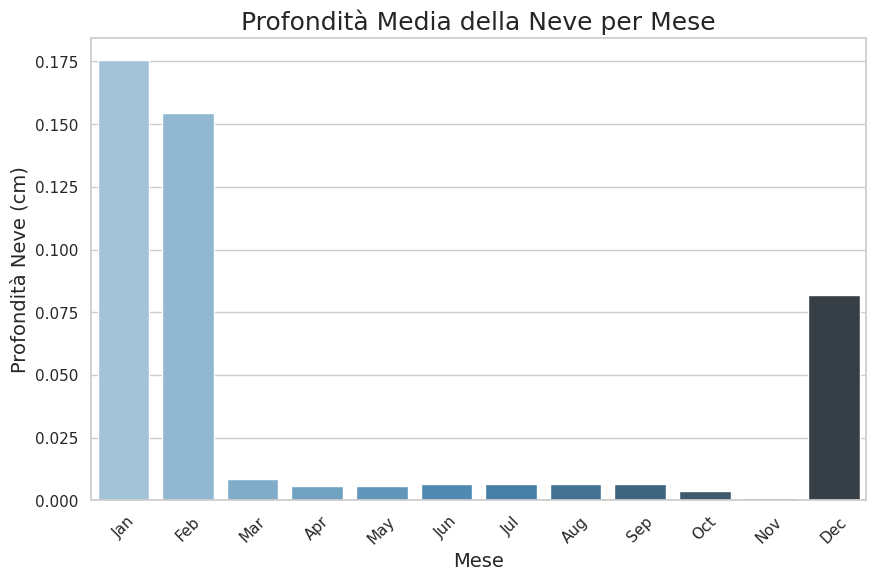

In [52]:
#Grafico a barre per neve media mensile
monthly_snow = data.groupby('month')['snow_depth'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=month_labels, y=monthly_snow, palette='Blues_d')
plt.title('Profondità Media della Neve per Mese', fontsize=18)
plt.xlabel('Mese', fontsize=14)
plt.ylabel('Profondità Neve (cm)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

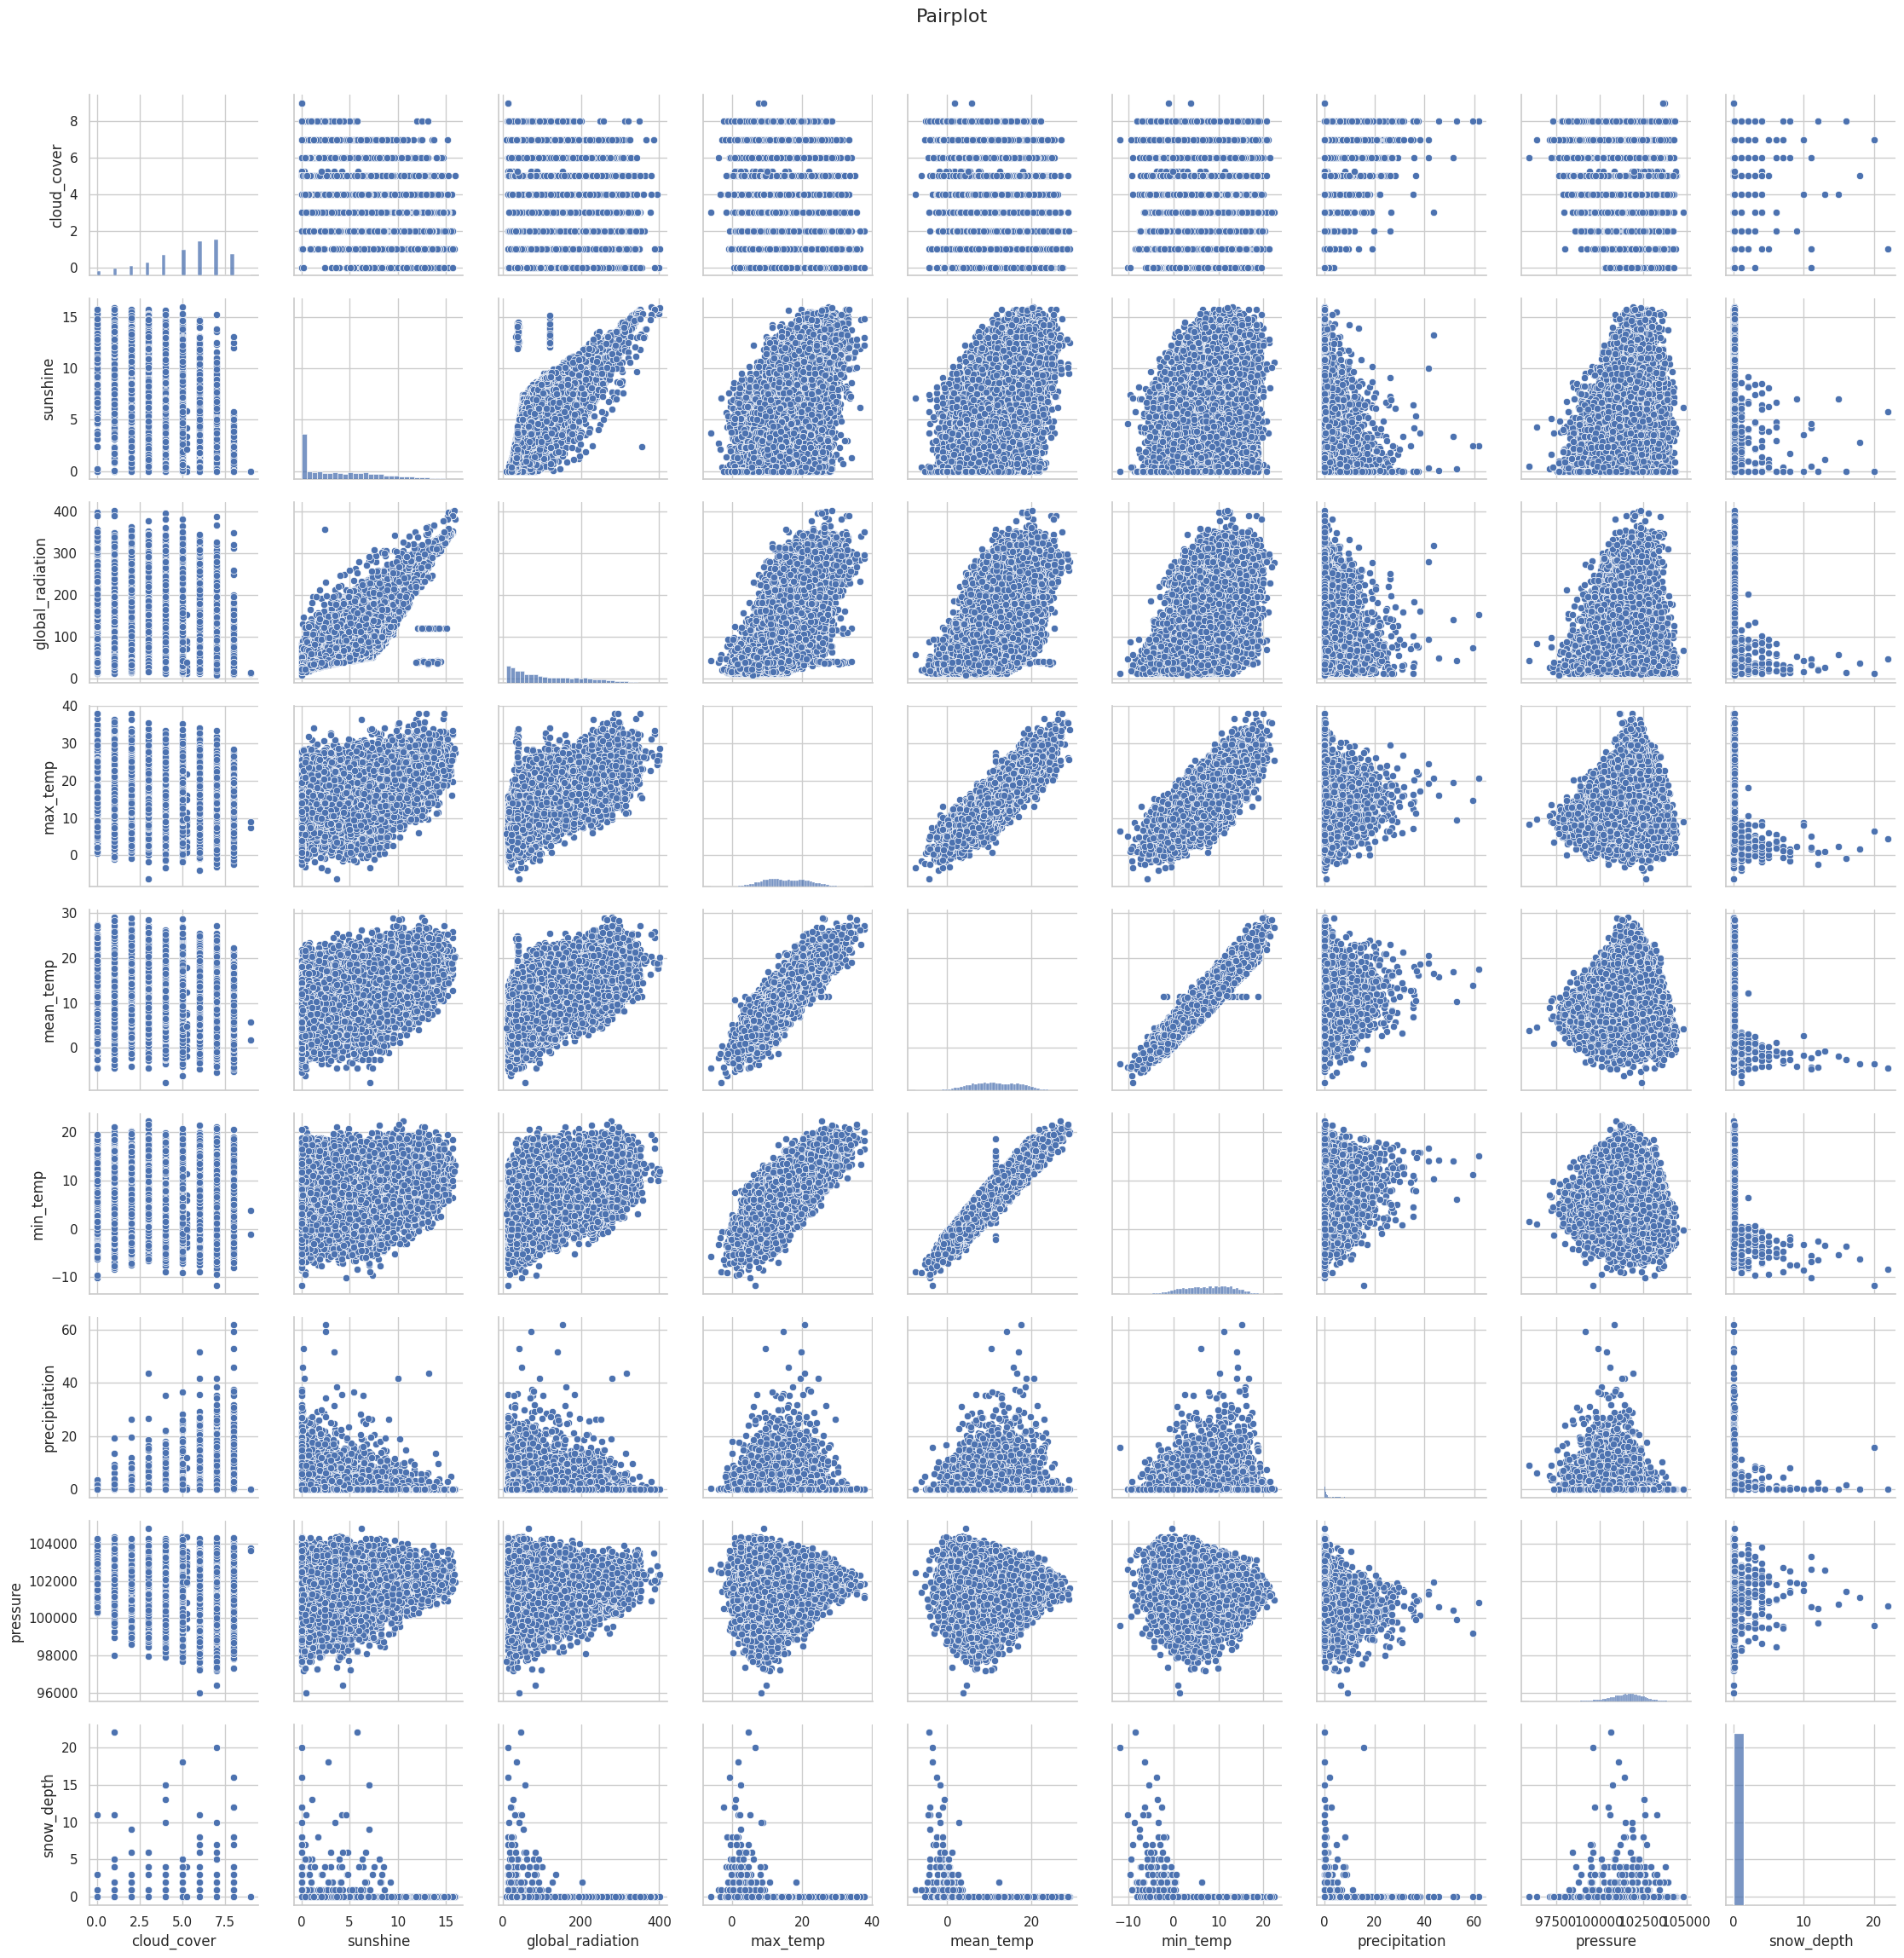

In [53]:


# Selezioniamo le colonne numeriche
selected_columns = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
                    'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']

# Creiamo il pairplot senza l'uso del kde, solo scatter plots
sns.pairplot(data[selected_columns], diag_kind="hist", palette="Set2")

# Aggiungiamo un titolo al grafico
plt.suptitle('Pairplot', y=1.02, fontsize=16)

# Rende il layout più compatto
plt.tight_layout()

# Mostriamo il grafico
plt.show()



<Axes: >

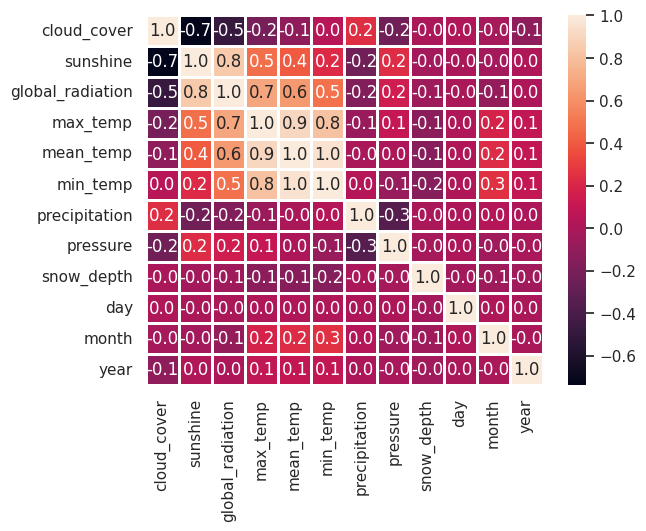

In [59]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.1f', linewidths=1)
